### lead score assignment 

In [1]:
import pandas as pnd ,numpy as nmp
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as ply
import seaborn as snb
%matplotlib inline

In [2]:
leadScore_dataset=pnd.read_csv('Leads.csv')
leadScore_dataset

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.00,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.50,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,579564,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,...,No,Potential Lead,Mumbai,02.Medium,01.High,15.0,17.0,No,No,Email Marked Spam
9236,82a7005b-7196-4d56-95ce-a79f937a158d,579546,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,19.0,No,Yes,SMS Sent
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,13.0,20.0,No,Yes,SMS Sent
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,579538,Landing Page Submission,Google,No,No,1,3.0,499,3.00,...,No,NaN,Other Metro Cities,02.Medium,02.Medium,15.0,16.0,No,No,SMS Sent


In [3]:
leadScore_dataset.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [4]:
# Missing Data Percentage 

round(leadScore_dataset.isnull().sum()/leadScore_dataset.shape[0], 2)

Prospect ID                                      0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.00
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      0.01
Total Time Spent on Website                      0.00
Page Views Per Visit                             0.01
Last Activity                                    0.01
Country                                          0.27
Specialization                                   0.16
How did you hear about X Education               0.24
What is your current occupation                  0.29
What matters most to you in choosing a course    0.29
Search                                           0.00
Magazine                                         0.00
Newspaper Article           

In [5]:
# Encoding the variables with yes/no labels
for feature in ['Do Not Email', 'Do Not Call', 'Search', 'Magazine', 'Newspaper Article','X Education Forums','Newspaper'
            ,'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses'
            ,'Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque'
           ,'A free copy of Mastering The Interview']:

    leadScore_dataset[feature] = leadScore_dataset[feature].apply(lambda x : 1 if x=='Yes' else 0)
leadScore_dataset.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,...,0,Select,Select,02.Medium,02.Medium,15.0,15.0,0,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,...,0,Select,Select,02.Medium,02.Medium,15.0,15.0,0,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,...,0,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,0,1,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,...,0,Select,Mumbai,02.Medium,01.High,13.0,17.0,0,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,...,0,Select,Mumbai,02.Medium,01.High,15.0,18.0,0,0,Modified


In [6]:
# Listing the categorical variables yet to be encoded
leadScore_dataset.select_dtypes(include='object').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 16 columns):
 #   Column                                         Non-Null Count  Dtype 
---  ------                                         --------------  ----- 
 0   Prospect ID                                    9240 non-null   object
 1   Lead Origin                                    9240 non-null   object
 2   Lead Source                                    9204 non-null   object
 3   Last Activity                                  9137 non-null   object
 4   Country                                        6779 non-null   object
 5   Specialization                                 7802 non-null   object
 6   How did you hear about X Education             7033 non-null   object
 7   What is your current occupation                6550 non-null   object
 8   What matters most to you in choosing a course  6531 non-null   object
 9   Tags                                           5887 non-null   

In [7]:
# Checking the labels of the remaining categorical columns

for col in leadScore_dataset.iloc[:,1:].select_dtypes(include='object').columns:
    print(col)
    print("_________________________________________________________________________________________________")
    print(leadScore_dataset[col].value_counts(normalize= True))
    print("_________________________________________________________________________________________________")

Lead Origin
_________________________________________________________________________________________________
Landing Page Submission    0.528788
API                        0.387446
Lead Add Form              0.077706
Lead Import                0.005952
Quick Add Form             0.000108
Name: Lead Origin, dtype: float64
_________________________________________________________________________________________________
Lead Source
_________________________________________________________________________________________________
Google               0.311604
Direct Traffic       0.276293
Olark Chat           0.190678
Organic Search       0.125380
Reference            0.058018
Welingak Website     0.015428
Referral Sites       0.013581
Facebook             0.005976
bing                 0.000652
google               0.000543
Click2call           0.000435
Press_Release        0.000217
Social Media         0.000217
Live Chat            0.000217
youtubechannel       0.000109
testone           

In [8]:
# Converting all the selects to NaN as the user didnt select any option from the list and "Select" is as good as "NaN"

leadScore_dataset = leadScore_dataset.replace('Select', nmp.nan)

In [9]:
#Dropping columns having more than 70% null values


leadScore_dataset = leadScore_dataset.drop(leadScore_dataset.loc[:,list(round(leadScore_dataset.isnull().sum()/leadScore_dataset.shape[0], 2)>0.70)].columns, 1)

In [10]:
# As the leads Quality depends upons the intuition of the employee, it will be safer to update the NaN to "Not Sure"

leadScore_dataset['Lead Quality'] = leadScore_dataset['Lead Quality'].replace(nmp.nan, 'Not Sure')


In [11]:
leadScore_dataset = leadScore_dataset.drop(['Asymmetrique Activity Index','Asymmetrique Activity Score','Asymmetrique Profile Index','Asymmetrique Profile Score'],1)

In [12]:
leadScore_dataset['City'] = leadScore_dataset['City'].replace(nmp.nan,'Mumbai')

In [13]:
leadScore_dataset['Specialization'] = leadScore_dataset['Specialization'].replace(nmp.nan, 'Other_Specialization')

In [14]:
leadScore_dataset['Tags'] = leadScore_dataset['Tags'].replace(nmp.nan, 'Will revert after reading the email')

In [15]:
leadScore_dataset['What matters most to you in choosing a course'] = leadScore_dataset['What matters most to you in choosing a course'].replace(nmp.nan, 'Better Career Prospects')


In [16]:
leadScore_dataset['What is your current occupation'] = leadScore_dataset['What is your current occupation'].replace(nmp.nan, 'Unemployed')



In [17]:
leadScore_dataset['Country'].value_counts(dropna=False)

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switzerland   

In [18]:
# Checking missing data percentage in the updated dataframe

round(100*(leadScore_dataset.isnull().sum()/len(leadScore_dataset.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                    0.00
What is your current occupation                   0.00
What matters most to you in choosing a course     0.00
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [19]:
# Remaining NULL values are less than 2% and hence these rows can be directly dropped
leadScore_dataset.dropna(inplace=True)

leadScore_dataset.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,...,0,0,Ringing,Not Sure,0,0,Mumbai,0,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,...,0,0,Will revert after reading the email,Might be,0,0,Mumbai,0,1,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,...,0,0,Ringing,Not Sure,0,0,Mumbai,0,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,...,0,0,Will revert after reading the email,Might be,0,0,Mumbai,0,0,Modified
6,9fae7df4-169d-489b-afe4-0f3d752542ed,660673,Landing Page Submission,Google,0,0,1,2.0,1640,2.0,...,0,0,Will revert after reading the email,Low in Relevance,0,0,Mumbai,0,0,Modified


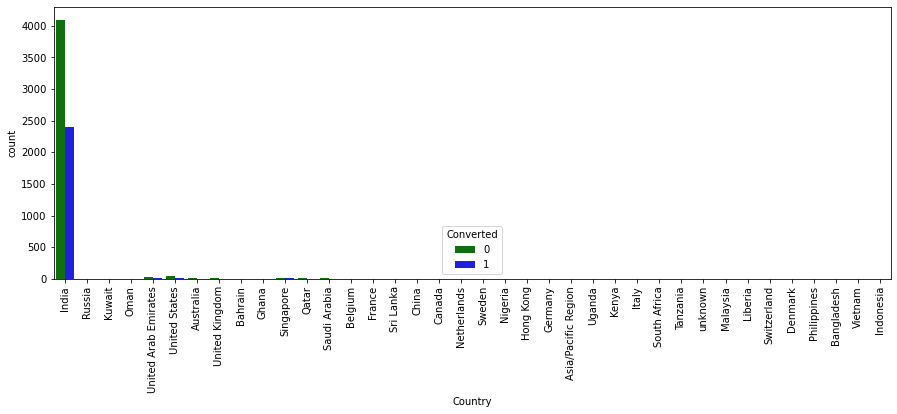

In [20]:
#plotting spread of Country columnn 
#plotting spread of Country columnn 
ply.figure(figsize=(15,5))
custom_palette = ['green', 'blue', 'purple']
x_countries=snb.countplot(leadScore_dataset.Country, hue=leadScore_dataset.Converted, palette=custom_palette)
x_countries.set_xticklabels(x_countries.get_xticklabels(),rotation=90)
ply.show()

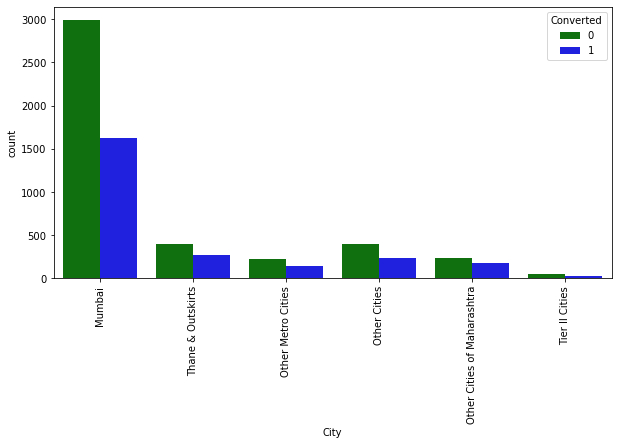

In [21]:
ply.figure(figsize=(10,5))
custom_palette = ['green', 'blue', 'purple']
x_counts=snb.countplot(leadScore_dataset.City, hue=leadScore_dataset.Converted, palette=custom_palette)
x_counts.set_xticklabels(x_counts.get_xticklabels(),rotation=90)
ply.show()

In [22]:
# Lets start with the target variable and see if we have any data imbalance or not 
leadScore_dataset["Converted"].value_counts(normalize=True)

0    0.63352
1    0.36648
Name: Converted, dtype: float64

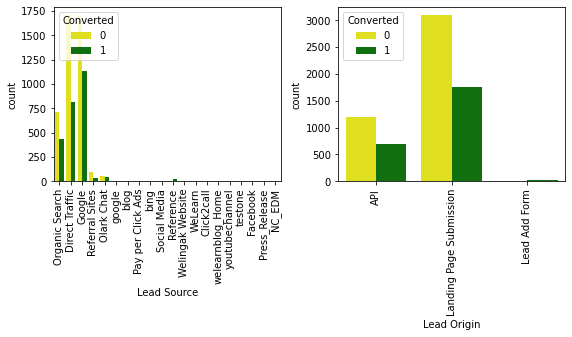

In [23]:
fig=ply.subplots(figsize=(12, 12))
custom_palette = ['yellow', 'green', 'blue', 'purple']
for i, feature in enumerate(['Lead Source', 'Lead Origin']):
    ply.subplot(3, 3, i+1)
    ply.subplots_adjust(hspace = 2.0)
    snb.countplot(leadScore_dataset[feature], hue=leadScore_dataset["Converted"], palette=custom_palette)
    ply.xticks(rotation=90)
    ply.tight_layout()

In [24]:
# We can clearly observe that the count of leads from various sources are close to negligible and hence we can club them into "Others" source for better visualisation and analysis

leadScore_dataset['Lead Source'] = leadScore_dataset['Lead Source'].replace(['Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 'Press_Release',
  'Social Media', 'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home', 'youtubechannel'], 'Other_Lead_Source')

leadScore_dataset['Lead Source'] = leadScore_dataset['Lead Source'].replace("google", 'Google')

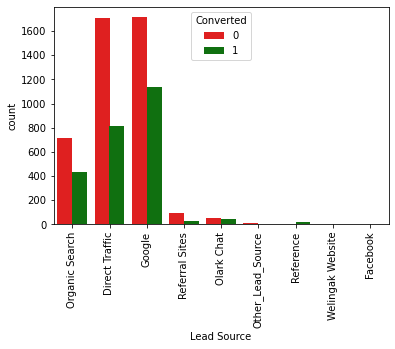

In [25]:
custom_palette = ['red', 'green', 'blue', 'purple']
snb.countplot(x="Lead Source", hue="Converted", data= leadScore_dataset, palette=custom_palette)
ply.xticks(rotation='vertical')
ply.show()

 so from this data OBSERVATION:

The count of leads from the Google and Direct Traffic is maximum

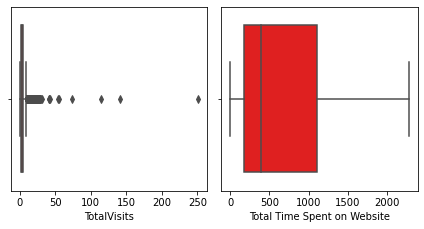

In [26]:
fig=ply.subplots(figsize=(6, 6))

for i, feature in enumerate(["TotalVisits", "Total Time Spent on Website"]):
    ply.subplot(2, 2, i+1)
    ply.subplots_adjust(hspace = 2.0)
    snb.boxplot(leadScore_dataset[feature],color ='red')
    ply.tight_layout()

In [27]:
# There are lot of outliers in the Total Visits columns and we can cap this variable to 95 percetile 

quantile1 = leadScore_dataset["TotalVisits"].quantile(0.95)
leadScore_dataset["TotalVisits"][leadScore_dataset["TotalVisits"] >= quantile1] = quantile1

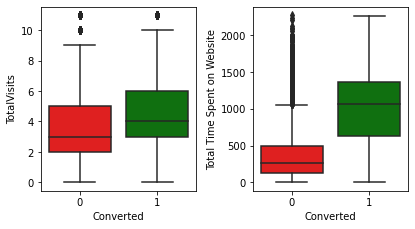

In [28]:
ig=ply.subplots(figsize=(6, 6))
custom_palette = ['red', 'green', 'blue', 'purple']
for i, feature in enumerate(["TotalVisits", "Total Time Spent on Website"]):
    ply.subplot(2, 2, i+1)
    ply.subplots_adjust(hspace = 2.0)
    snb.boxplot(y = feature, x = 'Converted', data = leadScore_dataset, palette=custom_palette)
    ply.tight_layout()

"There is a higher likelihood of user conversion for individuals who spend more time on the website."

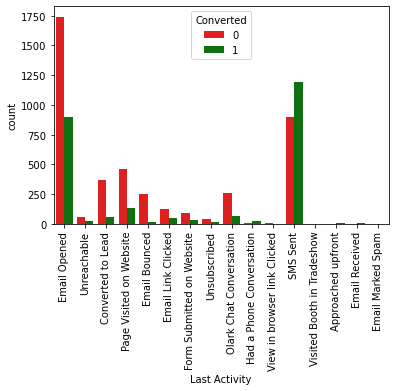

In [29]:
custom_palette = ['red', 'green', 'blue', 'purple']
snb.countplot(x="Last Activity", hue="Converted", data= leadScore_dataset, palette=custom_palette)
ply.xticks(rotation='vertical')
ply.show()

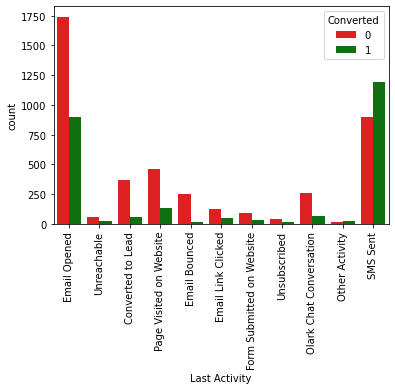

In [30]:
leadScore_dataset['Last Activity'] = leadScore_dataset['Last Activity'].replace(['Had a Phone Conversation', 'View in browser link Clicked', 
                                                       'Visited Booth in Tradeshow', 'Approached upfront',
                                                       'Resubscribed to emails','Email Received', 'Email Marked Spam'], 'Other Activity')

custom_palette = ['red', 'green', 'blue', 'purple']
snb.countplot(x="Last Activity", hue="Converted", data= leadScore_dataset, palette=custom_palette)
ply.xticks( rotation='vertical')
ply.show()

#### 1. The highest occurrence in the list of activities is "Email Opened."
#### 2 .The maximum conversion rate is associated with the last activity being "SMS Sent."

Our main objective is to improve the conversion rate of leads who have engaged with our emails by contacting them via phone calls. Additionally, we aim to increase the number of leads who have received SMS messages as their last activity.

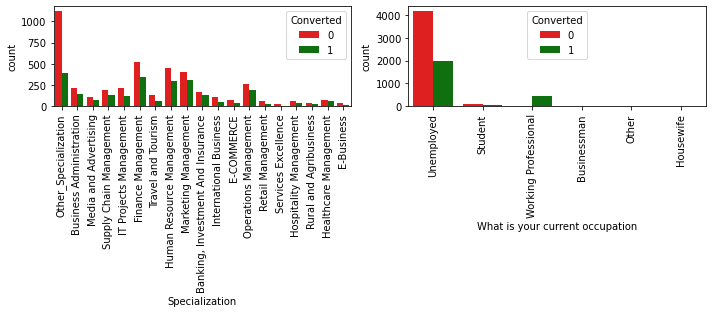

In [31]:
fig=ply.subplots(figsize=(10, 6))
custom_palette = ['red', 'green', 'blue', 'purple']
for i, feature in enumerate(["Specialization", "What is your current occupation"]):
    ply.subplot(2, 2, i+1)
    ply.subplots_adjust(hspace = 2.0)
    snb.countplot(x=feature, hue="Converted", data=leadScore_dataset, palette=custom_palette)
    ply.xticks( rotation='vertical')
    ply.tight_layout()

### Observation:

###### 1.Based on the provided plot, there is no conclusive evidence to draw specific conclusions regarding the impact of Specialization on the conversion rate.

###### 2.Based on the given plot, it can be observed that working professionals tend to exhibit a higher conversion rate.

###### 3.The plot indicates that the count of unemployed leads surpasses the count of leads in any other category.

#### To enhance the overall conversion rate, it is essential to expand the pool of Working Professional leads by engaging with them through various social platforms like LinkedIn. Additionally, efforts should be made to improve the conversion rate of leads who are currently unemployed.

The columns for Country, What matters most to you in choosing a course, and City predominantly consist of single values, such as India for Country and Mumbai for City. Therefore, these columns do not provide significant insights or variations for further analysis.

In [32]:
leadScore_dataset['What is your current occupation'] = leadScore_dataset['What is your current occupation'].replace("Other", 'Other_Occupation')

In [33]:
leadScore_dataset[["Search","Magazine","Newspaper Article","X Education Forums","Newspaper","Digital Advertisement",
         "Through Recommendations","Update me on Supply Chain Content","Get updates on DM Content"
         ,"I agree to pay the amount through cheque","A free copy of Mastering The Interview"]].describe()

,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview
count,6778.000000,6778.0,6778.000000,6778.000000,6778.000000,6778.000000,6778.000000,6778.0,6778.0,6778.0,6778.000000
mean,0.002066,0.0,0.000295,0.000148,0.000148,0.000590,0.001033,0.0,0.0,0.0,0.422839
std,0.045404,0.0,0.017176,0.012146,0.012146,0.024288,0.032122,0.0,0.0,0.0,0.494047
min,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000
25%,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000
50%,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000
75%,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.000000
max,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,0.0,1.000000


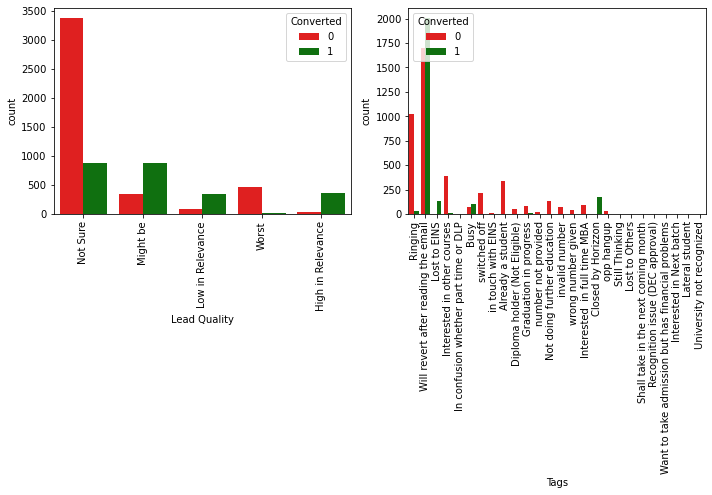

In [34]:
fig=ply.subplots(figsize=(10, 10))
custom_palette = ['red', 'green', 'blue', 'purple']
for i, feature in enumerate(["Lead Quality", "Tags"]):
    ply.subplot(2, 2, i+1)
    ply.subplots_adjust(hspace = 2.0)
    snb.countplot(x=feature, hue="Converted", data=leadScore_dataset, palette=custom_palette)
    ply.xticks( rotation='vertical')
    ply.tight_layout()

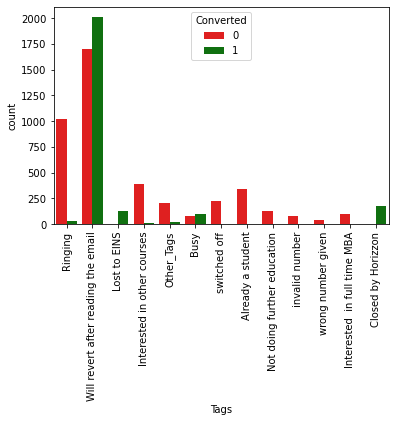

In [35]:
leadScore_dataset['Tags'] = leadScore_dataset['Tags'].replace(['In confusion whether part time or DLP', 'in touch with EINS','Diploma holder (Not Eligible)',
                                     'Approached upfront','Graduation in progress','number not provided', 'opp hangup','Still Thinking',
                                    'Lost to Others','Shall take in the next coming month','Lateral student','Interested in Next batch',
                                    'Recognition issue (DEC approval)','Want to take admission but has financial problems',
                                    'University not recognized'], 'Other_Tags')

custom_palette = ['red', 'green', 'blue', 'purple']
snb.countplot(x="Tags", hue="Converted", data= leadScore_dataset, palette=custom_palette)
ply.xticks( rotation='vertical')
ply.show()

#### Observation:

The conversion rate is notably high for leads who have responded with "Will revert after reading the email" and for leads that have been closed by Horizzon.

#### Summary:

To enhance the overall lead conversion rate, it is crucial to focus on improving the conversion rate of leads originating from 'API' and 'Landing Page Submission', while also increasing the number of leads from the 'Lead Add Form' source.

In order to improve the overall conversion rate, attention should be given to increasing the conversion rate of leads originating from 'Google', 'Olark Chat', 'Organic Search', and 'Direct Traffic'. Additionally, efforts should be made to boost the number of leads coming from 'Reference' and 'Welingak Website'.

To make websites more captivating and engaging, measures should be taken to increase the duration of user visits on the sites.

Efforts should be directed towards increasing the conversion rate of leads with the last activity recorded as "Email Opened" by contacting them through phone calls. Additionally, strategies should be implemented to augment the count of leads with the last activity as "SMS Sent".

To elevate the overall conversion rate, a targeted approach is needed to expand the number of leads from the "Working Professional" category by leveraging various social platforms such as LinkedIn. Furthermore, improvements should be made to increase the conversion rate of leads in the "Unemployed" category.

Moreover, it was observed that several columns contain data with a single value only. Since these columns do not contribute to any meaningful insights, they can be excluded from further analysis.

In [36]:
leadScore_dataset = leadScore_dataset.drop(['Lead Number','What matters most to you in choosing a course','Search','Magazine','Newspaper Article','X Education Forums','Newspaper',
           'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content',
           'Get updates on DM Content','I agree to pay the amount through cheque','A free copy of Mastering The Interview','Country','Do Not Call'],1)

leadScore_dataset.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,Lead Quality,City,Last Notable Activity
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Other_Specialization,Unemployed,Ringing,Not Sure,Mumbai,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Might be,Mumbai,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Ringing,Not Sure,Mumbai,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Other_Specialization,Unemployed,Will revert after reading the email,Might be,Mumbai,Modified
6,9fae7df4-169d-489b-afe4-0f3d752542ed,Landing Page Submission,Google,0,1,2.0,1640,2.0,Email Opened,Supply Chain Management,Unemployed,Will revert after reading the email,Low in Relevance,Mumbai,Modified


# Creating Dummy variable

In [37]:
leadScore_dummy = pnd.get_dummies(leadScore_dataset[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                              'Tags','Lead Quality','City','Last Notable Activity']], drop_first=True)
leadScore_dummy.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other_Lead_Source,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,...,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
6,1,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [38]:
leadScore_dataset = leadScore_dataset.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                              'Tags','Lead Quality','City','Last Notable Activity'], axis=1)
leadScore_dataset.head()

,Prospect ID,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
1,2a272436-5132-4136-86fa-dcc88c88f482,0,0,5.0,674,2.5
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,0,1,2.0,1532,2.0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0,0,1.0,305,1.0
4,3256f628-e534-4826-9d63-4a8b88782852,0,1,2.0,1428,1.0
6,9fae7df4-169d-489b-afe4-0f3d752542ed,0,1,2.0,1640,2.0


In [39]:
leadScore_dataset = pnd.concat([leadScore_dataset, leadScore_dummy], axis=1)
leadScore_dataset.head()

,Prospect ID,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
1,2a272436-5132-4136-86fa-dcc88c88f482,0,0,5.0,674,2.5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,0,1,2.0,1532,2.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0,0,1.0,305,1.0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,0,1,2.0,1428,1.0,1,0,0,1,...,0,0,0,1,0,0,0,0,0,0
6,9fae7df4-169d-489b-afe4-0f3d752542ed,0,1,2.0,1640,2.0,1,0,0,1,...,0,0,0,1,0,0,0,0,0,0


#  Lets perform Test-Train Split

In [40]:
# Putting feature variable to X
X_leadScore = leadScore_dataset.drop(['Prospect ID','Converted'], axis=1)
# Putting response variable to y
y_leadScore = leadScore_dataset['Converted']

print(y_leadScore)

X_leadScore.head()

1       0
2       1
3       0
4       1
6       1
       ..
9235    1
9236    0
9237    0
9238    1
9239    1
Name: Converted, Length: 6778, dtype: int64


,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,...,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
1,0,5.0,674,2.5,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,2.0,1532,2.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,2.0,1428,1.0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
6,0,2.0,1640,2.0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0


In [41]:
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 
import statsmodels.api as statm
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

X_leadScore_train, X_leadScore_test, y_leadScore_train, y_leadScore_test = train_test_split(X_leadScore, y_leadScore, train_size=0.7, test_size=0.3, random_state=100)

# Lets scale features now 

In [42]:
leadScore_scaler = StandardScaler()

X_leadScore_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = leadScore_scaler.fit_transform(X_leadScore_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_leadScore_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,...,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
2746,0,-0.484806,0.186744,-0.064604,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
6543,0,-0.876281,-0.854513,-0.601802,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7458,0,-0.484806,1.624932,-0.064604,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7448,0,0.298145,0.554137,1.009791,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
6134,0,-0.484806,0.559676,-0.064604,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
print("Conversion rate is ", (sum(leadScore_dataset['Converted'])/len(leadScore_dataset['Converted'].index))*100)

Conversion rate is  36.64797875479493


# Lets Look at Correlations now

In [44]:

# Correlation between different numerical variables for both the Converted and not-converted cases
converted_notconv_correlation = leadScore_dataset.corr()

# Unstacking the correlation matrix to find out top correlations
converted_notconv_correlation_unstacked = converted_notconv_correlation.unstack().sort_values(kind="quicksort")
converted_notconv_correlation.where(nmp.triu(nmp.ones(converted_notconv_correlation.shape), k=1).astype(nmp.bool)).stack().sort_values(ascending=False).head(10)

Lead Origin_Lead Add Form              Lead Source_Reference                             0.881525
Last Activity_Email Opened             Last Notable Activity_Email Opened                0.870051
Last Activity_Unsubscribed             Last Notable Activity_Unsubscribed                0.867906
Last Activity_SMS Sent                 Last Notable Activity_SMS Sent                    0.848294
Last Activity_Email Link Clicked       Last Notable Activity_Email Link Clicked          0.795495
Last Activity_Page Visited on Website  Last Notable Activity_Page Visited on Website     0.675982
Do Not Email                           Last Activity_Email Bounced                       0.625987
Last Activity_Other Activity           Last Notable Activity_Had a Phone Conversation    0.622595
TotalVisits                            Page Views Per Visit                              0.560931
Last Activity_Unreachable              Last Notable Activity_Unreachable                 0.560753
dtype: float64

In [45]:
   X_leadScore_test = X_leadScore_test.drop(['Lead Source_Facebook','Last Notable Activity_Unsubscribed','Last Notable Activity_SMS Sent',
                      'Last Notable Activity_Email Opened','Last Notable Activity_Unreachable','Last Notable Activity_Email Link Clicked','Last Notable Activity_Page Visited on Website'], 1)
X_leadScore_train = X_leadScore_train.drop(['Lead Source_Facebook','Last Notable Activity_Unsubscribed','Last Notable Activity_SMS Sent',
                      'Last Notable Activity_Email Opened','Last Notable Activity_Unreachable','Last Notable Activity_Email Link Clicked','Last Notable Activity_Page Visited on Website'], 1)

In [46]:
converted_notconv_correlation = X_leadScore_train.corr()

In [47]:
converted_notconv_correlation.where(nmp.triu(nmp.ones(converted_notconv_correlation.shape), k=1).astype(nmp.bool)).stack().sort_values(ascending=False).head(10)

Lead Origin_Lead Add Form                             Lead Source_Reference                             0.912581
Last Activity_Other Activity                          Last Notable Activity_Had a Phone Conversation    0.625657
Do Not Email                                          Last Activity_Email Bounced                       0.618320
TotalVisits                                           Page Views Per Visit                              0.590447
Last Activity_Olark Chat Conversation                 Last Notable Activity_Olark Chat Conversation     0.459460
Last Activity_Email Bounced                           Last Notable Activity_Email Bounced               0.443885
Lead Origin_Lead Add Form                             Lead Source_Welingak Website                      0.407602
What is your current occupation_Unemployed            Lead Quality_Not Sure                             0.347116
What is your current occupation_Working Professional  Lead Quality_Might be                     

# Creating model

In [48]:
# Logistic regression model

logistic_regression_model = statm.GLM(y_leadScore_train,(statm.add_constant(X_leadScore_train)), family = statm.families.Binomial())
logistic_regression_model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4744
Model:                            GLM   Df Residuals:                     4670
Model Family:                Binomial   Df Model:                           73
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Wed, 26 Jul 2023   Deviance:                       60972.
Time:                        17:58:38   Pearson chi2:                 2.98e+18
No. Iterations:                    60   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                -1.276e+15   3.53e+07  -3.61e+07      0.000   -1.28e+15   -1.28e+15
Do Not Email                                          -2.61e+14   4.94e+06  -5.28e+07      0.000   -2.61e+14   -2.61e+14
TotalVisits                                           1.584e+13   1.32e+06    1.2e+07      0.000    1.58e+13    1.58e+13
Total Time Spent on Website                           3.254e+14   1.07e+06   3.05e+08      0.000    3.25e+14    3.25e+14
Page Views Per Visit                                  1.058e+12   1.29e+06   8.19e+05      0.000    1.06e+12    1.06e+12
Lead Origin_Landing Page Submission                  -2.733e+14    3.9e+06  -7.01e+07      0.000   -2.73e+14   -2.73e+14
Lead Origin_Lead Add Form                             1.648e+15   1.47e+07   1.12e+08      0.000    1.65e+15    1.65e+15
Lead Source_Google                                   -2.644e+13   2.48e+06  -1.07e+07      0.000   -2.64e+13   -2.64e+13
Lead Source_Olark Chat                               -5.697e+14   9.17e+06  -6.21e+07      0.000    -5.7e+14    -5.7e+14
Lead Source_Organic Search                            2.676e+13   3.25e+06   8.23e+06      0.000    2.68e+13    2.68e+13
Lead Source_Other_Lead_Source                        -3.528e+14   2.04e+07  -1.73e+07      0.000   -3.53e+14   -3.53e+14
Lead Source_Reference                                 6.473e+13   1.77e+07   3.66e+06      0.000    6.47e+13    6.47e+13
Lead Source_Referral Sites                           -2.253e+14   7.65e+06  -2.94e+07      0.000   -2.25e+14   -2.25e+14
Lead Source_Welingak Website                          1.583e+15   2.67e+07   5.94e+07      0.000    1.58e+15    1.58e+15
Last Activity_Email Bounced                          -1.595e+14   8.29e+06  -1.92e+07      0.000   -1.59e+14   -1.59e+14
Last Activity_Email Link Clicked                     -2.075e+14   7.76e+06  -2.67e+07      0.000   -2.07e+14   -2.07e+14
Last Activity_Email Opened                           -3.595e+14   4.86e+06   -7.4e+07      0.000   -3.59e+14   -3.59e+14
Last Activity_Form Submitted on Website              -2.164e+13    8.3e+06  -2.61e+06      0.000   -2.16e+13   -2.16e+13
Last Activity_Olark Chat Conversation                  2.34e+14   6.41e+06   3.65e+07      0.000    2.34e+14    2.34e+14
Last Activity_Other Activity                          1.062e+14   1.85e+07   5.74e+06      0.000    1.06e+14    1.06e+14
Last Activity_Page Visited on Website                 4.861e+13   5.62e+06   8.64e+06      0.000    4.86e+13    4.86e+13
Last Activity_SMS Sent                                3.665e+14   4.95e+06   7.41e+07      0.000    3.66e+14    3.66e+14
Last Activity_Unreachable                            -1.38

#  Lets Select features using RFE

In [49]:
leadScore_logistic_reg = LogisticRegression()
leadScore_rfe = RFE(estimator=leadScore_logistic_reg, n_features_to_select=15)  
leadScore_rfe = leadScore_rfe.fit(X_leadScore_train, y_leadScore_train)

list(zip(X_leadScore_train.columns, leadScore_rfe.support_, leadScore_rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 39),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 42),
 ('Lead Origin_Landing Page Submission', False, 2),
 ('Lead Origin_Lead Add Form', False, 7),
 ('Lead Source_Google', False, 36),
 ('Lead Source_Olark Chat', False, 4),
 ('Lead Source_Organic Search', False, 35),
 ('Lead Source_Other_Lead_Source', False, 34),
 ('Lead Source_Reference', False, 38),
 ('Lead Source_Referral Sites', False, 57),
 ('Lead Source_Welingak Website', False, 14),
 ('Last Activity_Email Bounced', False, 22),
 ('Last Activity_Email Link Clicked', False, 23),
 ('Last Activity_Email Opened', False, 24),
 ('Last Activity_Form Submitted on Website', False, 56),
 ('Last Activity_Olark Chat Conversation', False, 44),
 ('Last Activity_Other Activity', False, 8),
 ('Last Activity_Page Visited on Website', False, 25),
 ('Last Activity_SMS Sent', True, 1),
 ('Last Activity_Unreachable', False, 9),
 ('Last Activity_Unsubscribed', False, 45)

In [50]:
leadScore_column = X_leadScore_train.columns[leadScore_rfe.support_]

Analyzing the model with StatsModels

In [51]:
X_leadScore_train_sm = statm.add_constant(X_leadScore_train[leadScore_column])
X_leadScore_logisticmodel2 = statm.GLM(y_leadScore_train,X_leadScore_train_sm, family = statm.families.Binomial())
result_leadScore = X_leadScore_logisticmodel2.fit()
result_leadScore.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4744
Model:                            GLM   Df Residuals:                     4728
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1034.2
Date:                Wed, 26 Jul 2023   Deviance:                       2068.3
Time:                        17:58:41   Pearson chi2:                 1.30e+04
No. Iterations:                    22   Pseudo R-squ. (CS):             0.5829
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                          0.0511      0.382      0.134      0.894      -0.698       0.800
Do Not Email                                  -1.3772      0.269     -5.113      0.000      -1.905      -0.849
Total Time Spent on Website                    1.0832      0.060     18.145      0.000       0.966       1.200
Last Activity_SMS Sent                         1.5088      0.124     12.164      0.000       1.266       1.752
What is your current occupation_Student       -1.4937      0.694     -2.152      0.031      -2.854      -0.133
What is your current occupation_Unemployed    -1.5451      0.334     -4.622      0.000      -2.200      -0.890
Tags_Busy                                      3.8023      0.359     10.596      0.000       3.099       4.506
Tags_Closed by Horizzon                        8.6790      1.091      7.957      0.000       6.541      10.817
Tags_Lost to EINS                              8.6774      0.787     11.027      0.000       7.135      10.220
Tags_Ringing                                  -1.2299      0.358     -3.440      0.001      -1.931      -0.529
Tags_Will revert after reading the email       3.5949      0.263     13.673      0.000       3.080       4.110
Tags_switched off                             -2.6356      0.794     -3.320      0.001      -4.191      -1.080
Tags_wrong number given                      -20.8361   1.16e+04     -0.002      0.999   -2.27e+04    2.27e+04
Lead Quality_Not Sure                         -3.0462      0.151    -20.109      0.000      -3.343      -2.749
Lead Quality_Worst                            -3.4822      0.740     -4.704      0.000      -4.933      -2.031
Last Notable Activity_Modified                -1.3219      0.129    -10.262      0.000      -1.574      -1.069
==============================================================================================================
"""

In [52]:
# Getting the predicted values on the train set
y_leadScore_train_pred = result_leadScore.predict(X_leadScore_train_sm)
y_leadScore_train_pred[:10]

2746    0.999505
6543    0.002727
7458    0.910820
7448    0.996843
6134    0.937446
418     0.000285
6439    0.000737
2837    0.987765
5336    0.047480
8261    0.989891
dtype: float64

In [53]:
y_leadScore_train_pred = y_leadScore_train_pred.values.reshape(-1)
y_leadScore_train_pred[:10]

array([9.99505004e-01, 2.72715026e-03, 9.10819710e-01, 9.96843154e-01,
       9.37446155e-01, 2.85339830e-04, 7.37370422e-04, 9.87765014e-01,
       4.74795989e-02, 9.89891090e-01])

# Creating a dataframe with the true convertion status and the predicted probabilities


In [54]:
y_leadScore_train_pred_final = pnd.DataFrame({'Convert':y_leadScore_train.values, 'Convert_Prob':y_leadScore_train_pred})
y_leadScore_train_pred_final['Pros_ID'] = y_leadScore_train.index
y_leadScore_train_pred_final.head()

,Convert,Convert_Prob,Pros_ID
0,1,0.999505,2746
1,0,0.002727,6543
2,1,0.910820,7458
3,1,0.996843,7448
4,1,0.937446,6134


In [55]:
# Creating new column 'predicted' with 1 if Convert_Prob > 0.5 else 0

y_leadScore_train_pred_final['predicted'] = y_leadScore_train_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_leadScore_train_pred_final.head()

,Convert,Convert_Prob,Pros_ID,predicted
0,1,0.999505,2746,1
1,0,0.002727,6543,0
2,1,0.910820,7458,1
3,1,0.996843,7448,1
4,1,0.937446,6134,1


In [56]:

from sklearn import metrics

print("Accuracy score", metrics.accuracy_score(y_leadScore_train_pred_final.Convert, y_leadScore_train_pred_final.predicted))

Accuracy score 0.9137858347386172


Checking VIFs 

In [57]:
def leadScore_calculate_vif(X_leadScore_train):
    leadScore_vif = pnd.DataFrame()
    leadScore_vif['Features'] = X_leadScore_train.columns
    leadScore_vif['Variance Inflation Factor'] = [variance_inflation_factor(X_leadScore_train.values, i) for i in range(X_leadScore_train.shape[1])]
    leadScore_vif['Variance Inflation Factor'] = round(leadScore_vif['Variance Inflation Factor'], 2)
    leadScore_vif = leadScore_vif.sort_values(by = 'Variance Inflation Factor', ascending = False)
    print(leadScore_vif)

leadScore_calculate_vif(X_leadScore_train[leadScore_column])

                                      Features  Variance Inflation Factor
4   What is your current occupation_Unemployed                       8.31
12                       Lead Quality_Not Sure                       4.07
9     Tags_Will revert after reading the email                       3.77
8                                 Tags_Ringing                       1.99
14              Last Notable Activity_Modified                       1.68
13                          Lead Quality_Worst                       1.66
2                       Last Activity_SMS Sent                       1.60
10                           Tags_switched off                       1.21
5                                    Tags_Busy                       1.20
1                  Total Time Spent on Website                       1.18
0                                 Do Not Email                       1.15
3      What is your current occupation_Student                       1.15
6                      Tags_Closed by 

In [58]:
leadScore_column = leadScore_column.drop('Tags_wrong number given')
leadScore_column

Index(['Do Not Email', 'Total Time Spent on Website', 'Last Activity_SMS Sent',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off',
       'Lead Quality_Not Sure', 'Lead Quality_Worst',
       'Last Notable Activity_Modified'],
      dtype='object')

In [59]:
# After re running we get
X_leadScore_train_sm = statm.add_constant(X_leadScore_train[leadScore_column])
X_leadScore_logisticmodel3 = statm.GLM(y_leadScore_train,X_leadScore_train_sm, family = statm.families.Binomial())
result_leadScore = X_leadScore_logisticmodel3.fit()
result_leadScore.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4744
Model:                            GLM   Df Residuals:                     4729
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1036.1
Date:                Wed, 26 Jul 2023   Deviance:                       2072.1
Time:                        17:58:41   Pearson chi2:                 1.30e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5826
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                         -0.0154      0.383     -0.040      0.968      -0.766       0.735
Do Not Email                                  -1.3780      0.269     -5.129      0.000      -1.905      -0.851
Total Time Spent on Website                    1.0809      0.060     18.136      0.000       0.964       1.198
Last Activity_SMS Sent                         1.5058      0.124     12.161      0.000       1.263       1.749
What is your current occupation_Student       -1.4878      0.697     -2.133      0.033      -2.855      -0.121
What is your current occupation_Unemployed    -1.5629      0.335     -4.663      0.000      -2.220      -0.906
Tags_Busy                                      3.8813      0.358     10.829      0.000       3.179       4.584
Tags_Closed by Horizzon                        8.7494      1.091      8.022      0.000       6.612      10.887
Tags_Lost to EINS                              8.7429      0.787     11.108      0.000       7.200      10.286
Tags_Ringing                                  -1.1446      0.357     -3.210      0.001      -1.843      -0.446
Tags_Will revert after reading the email       3.6726      0.263     13.973      0.000       3.157       4.188
Tags_switched off                             -2.5494      0.793     -3.214      0.001      -4.104      -0.995
Lead Quality_Not Sure                         -3.0405      0.151    -20.108      0.000      -3.337      -2.744
Lead Quality_Worst                            -3.4209      0.741     -4.616      0.000      -4.874      -1.968
Last Notable Activity_Modified                -1.3129      0.129    -10.204      0.000      -1.565      -1.061
==============================================================================================================
"""

In [60]:
y_leadScore_train_pred = result_leadScore.predict(X_leadScore_train_sm).values.reshape(-1)
y_leadScore_train_pred_final['Convert_Prob'] = y_leadScore_train_pred

# Creating new column 'predicted' with 1 if Convert_Prob > 0.5 else 0
y_leadScore_train_pred_final['predicted'] = y_leadScore_train_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_leadScore_train_pred_final.head()

,Convert,Convert_Prob,Pros_ID,predicted
0,1,0.999511,2746,1
1,0,0.002670,6543,0
2,1,0.910193,7458,1
3,1,0.996865,7448,1
4,1,0.936982,6134,1


In [61]:
print("Accuracy score", metrics.accuracy_score(y_leadScore_train_pred_final.Convert, y_leadScore_train_pred_final.predicted))

Accuracy score 0.9139966273187183


In [62]:
leadScore_calculate_vif(X_leadScore_train[leadScore_column])

                                      Features  Variance Inflation Factor
4   What is your current occupation_Unemployed                       8.22
11                       Lead Quality_Not Sure                       4.06
9     Tags_Will revert after reading the email                       3.69
8                                 Tags_Ringing                       1.96
13              Last Notable Activity_Modified                       1.68
12                          Lead Quality_Worst                       1.66
2                       Last Activity_SMS Sent                       1.59
10                           Tags_switched off                       1.20
5                                    Tags_Busy                       1.19
1                  Total Time Spent on Website                       1.18
0                                 Do Not Email                       1.15
3      What is your current occupation_Student                       1.15
6                      Tags_Closed by 

here vif of What is your current occupation_Unemployed and Lead Quality_Not Sure is significantly high considering threshold of 5 therefore we drop these 2 columns 

In [63]:
# Assuming your DataFrame is named 'df'
leadScore_column = leadScore_column.drop('What is your current occupation_Unemployed')
leadScore_column

Index(['Do Not Email', 'Total Time Spent on Website', 'Last Activity_SMS Sent',
       'What is your current occupation_Student', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off',
       'Lead Quality_Not Sure', 'Lead Quality_Worst',
       'Last Notable Activity_Modified'],
      dtype='object')

In [64]:
# After re running we get
X_leadScore_train_sm = statm.add_constant(X_leadScore_train[leadScore_column])
X_leadScore_logisticmodel4 = statm.GLM(y_leadScore_train,X_leadScore_train_sm, family = statm.families.Binomial())
result_leadScore = X_leadScore_logisticmodel4.fit()
result_leadScore.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4744
Model:                            GLM   Df Residuals:                     4730
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1048.8
Date:                Wed, 26 Jul 2023   Deviance:                       2097.7
Time:                        17:58:42   Pearson chi2:                 1.47e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5803
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -1.3617      0.250     -5.443      0.000      -1.852      -0.871
Do Not Email                                -1.3746      0.270     -5.094      0.000      -1.903      -0.846
Total Time Spent on Website                  1.0838      0.059     18.256      0.000       0.967       1.200
Last Activity_SMS Sent                       1.4846      0.123     12.068      0.000       1.244       1.726
What is your current occupation_Student     -0.1212      0.638     -0.190      0.849      -1.372       1.129
Tags_Busy                                    3.8971      0.357     10.920      0.000       3.198       4.597
Tags_Closed by Horizzon                      8.7517      1.090      8.029      0.000       6.615      10.888
Tags_Lost to EINS                            8.7481      0.786     11.125      0.000       7.207      10.289
Tags_Ringing                                -1.2804      0.356     -3.601      0.000      -1.977      -0.583
Tags_Will revert after reading the email     3.7154      0.260     14.298      0.000       3.206       4.225
Tags_switched off                           -2.6694      0.797     -3.350      0.001      -4.231      -1.108
Lead Quality_Not Sure                       -3.2760      0.147    -22.252      0.000      -3.565      -2.987
Lead Quality_Worst                          -3.5283      0.743     -4.749      0.000      -4.984      -2.072
Last Notable Activity_Modified              -1.2951      0.127    -10.171      0.000      -1.545      -1.046
============================================================================================================
"""

In [65]:
leadScore_column = leadScore_column.drop('What is your current occupation_Student')
leadScore_column

Index(['Do Not Email', 'Total Time Spent on Website', 'Last Activity_SMS Sent',
       'Tags_Busy', 'Tags_Closed by Horizzon', 'Tags_Lost to EINS',
       'Tags_Ringing', 'Tags_Will revert after reading the email',
       'Tags_switched off', 'Lead Quality_Not Sure', 'Lead Quality_Worst',
       'Last Notable Activity_Modified'],
      dtype='object')

In [66]:
# After re running we get
X_leadScore_train_sm = statm.add_constant(X_leadScore_train[leadScore_column])
X_leadScore_logisticmodel5 = statm.GLM(y_leadScore_train,X_leadScore_train_sm, family = statm.families.Binomial())
result_leadScore = X_leadScore_logisticmodel5.fit()
result_leadScore.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4744
Model:                            GLM   Df Residuals:                     4731
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1048.8
Date:                Wed, 26 Jul 2023   Deviance:                       2097.7
Time:                        17:58:42   Pearson chi2:                 1.47e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5803
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -1.3669      0.249     -5.494      0.000      -1.855      -0.879
Do Not Email                                -1.3748      0.270     -5.098      0.000      -1.903      -0.846
Total Time Spent on Website                  1.0836      0.059     18.256      0.000       0.967       1.200
Last Activity_SMS Sent                       1.4851      0.123     12.075      0.000       1.244       1.726
Tags_Busy                                    3.8991      0.357     10.926      0.000       3.200       4.599
Tags_Closed by Horizzon                      8.7540      1.090      8.032      0.000       6.618      10.890
Tags_Lost to EINS                            8.7454      0.786     11.124      0.000       7.204      10.286
Tags_Ringing                                -1.2762      0.355     -3.595      0.000      -1.972      -0.581
Tags_Will revert after reading the email     3.7175      0.260     14.310      0.000       3.208       4.227
Tags_switched off                           -2.6650      0.796     -3.346      0.001      -4.226      -1.104
Lead Quality_Not Sure                       -3.2734      0.147    -22.343      0.000      -3.561      -2.986
Lead Quality_Worst                          -3.5394      0.743     -4.767      0.000      -4.995      -2.084
Last Notable Activity_Modified              -1.2946      0.127    -10.171      0.000      -1.544      -1.045
============================================================================================================
"""

#### Observation: All variables in the model have acceptable values for VIF (Variance Inflation Factor) and p-values. As a result, there is no need to remove any additional variables, and we can proceed with making predictions using this model as it is. 

In [67]:
y_leadScore_train_pred = result_leadScore.predict(X_leadScore_train_sm).values.reshape(-1)
y_leadScore_train_pred_final['Convert_Prob'] = y_leadScore_train_pred

# Creating new column 'predicted' with 1 if Convert_Prob > 0.5 else 0
y_leadScore_train_pred_final['predicted'] = y_leadScore_train_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_leadScore_train_pred_final.head()

,Convert,Convert_Prob,Pros_ID,predicted
0,1,0.998158,2746,1
1,0,0.002923,6543,0
2,1,0.910774,7458,1
3,1,0.988297,7448,1
4,1,0.950594,6134,1


In [68]:
print("Accuracy score", metrics.accuracy_score(y_leadScore_train_pred_final.Convert, y_leadScore_train_pred_final.predicted))

Accuracy score 0.9150505902192243


In [69]:
leadScore_calculate_vif(X_leadScore_train[leadScore_column])

                                    Features  Variance Inflation Factor
9                      Lead Quality_Not Sure                       2.86
7   Tags_Will revert after reading the email                       2.38
11            Last Notable Activity_Modified                       1.60
2                     Last Activity_SMS Sent                       1.56
6                               Tags_Ringing                       1.55
1                Total Time Spent on Website                       1.18
0                               Do Not Email                       1.15
3                                  Tags_Busy                       1.14
10                        Lead Quality_Worst                       1.14
8                          Tags_switched off                       1.12
5                          Tags_Lost to EINS                       1.08
4                    Tags_Closed by Horizzon                       1.04


In [70]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import precision_recall_curve
def leadScore_evaluate_model(y_leadScore_true, y_leadScore_predicted, print_score=False):
    leadScore_confusion_matrix = metrics.confusion_matrix(y_leadScore_true, y_leadScore_predicted)
    # Predicted     not_converted    converted
    # Actual
    # not_converted        TN         FP
    # converted            FN         TP

    True_Positive = leadScore_confusion_matrix[1,1] # true positive 
    True_Negative = leadScore_confusion_matrix[0,0] # true negatives
    False_Positive = leadScore_confusion_matrix[0,1] # false positives
    False_Negative = leadScore_confusion_matrix[1,0] # false negatives

    leadScore_accuracy_sc = metrics.accuracy_score(y_leadScore_true, y_leadScore_predicted)
    leadScore_sensitivity_score = True_Positive / float(True_Positive+False_Negative)
    leadScore_specificity_score = True_Negative / float(True_Negative+False_Positive)
    leadScore_precision_sc = precision_score(y_leadScore_true, y_leadScore_predicted)
    
    if print_score:
        print("lead Score Confusion Matrix :\n", leadScore_confusion_matrix)
        print("lead score Accuracy :", leadScore_accuracy_sc)
        print("lead Score Sensitivity :", leadScore_sensitivity_score)
        print("lead score Specificity :", leadScore_specificity_score)
        print("lead score Precision :", leadScore_precision_sc)
        
    return leadScore_accuracy_sc, leadScore_sensitivity_score, leadScore_specificity_score, leadScore_precision_sc

In [71]:
leadScore_evaluate_model(y_leadScore_train_pred_final.Convert, y_leadScore_train_pred_final.predicted, print_score=True)

lead Score Confusion Matrix :
 [[2848  173]
 [ 230 1493]]
lead score Accuracy : 0.9150505902192243
lead Score Sensitivity : 0.8665118978525828
lead score Specificity : 0.9427341939755048
lead score Precision : 0.8961584633853541


(0.9150505902192243,
 0.8665118978525828,
 0.9427341939755048,
 0.8961584633853541)

# ROC curve  Plot

An ROC curve illustrates the balance between sensitivity and specificity, where an increase in one measure results in a decrease in the other. A curve that closely aligns with the y-axis and the top border of the ROC space indicates a higher area under the curve, suggesting a more accurate test. Conversely, if the curve approaches the 45-degree diagonal reference line within the ROC space, it indicates a lower area and a less accurate test. In this scenario, our objective is to attain a favorable sensitivity score.

In [72]:
def leadScore_draw_roc( leadScore_actual, leadScore_probs ):
    false_positive_rate, true_positive_rate, ROC_thresholds = metrics.roc_curve( leadScore_actual, leadScore_probs,
                                              drop_intermediate = False )
    leadScore_auc_score = metrics.roc_auc_score( leadScore_actual, leadScore_probs )
    ply.figure(figsize=(5, 5))
    ply.plot( false_positive_rate, true_positive_rate, label='ROC curve (area = %0.2f)' % leadScore_auc_score )
    ply.plot([0, 1], [0, 1], 'k--')
    ply.xlim([0.0, 1.0])
    ply.ylim([0.0, 1.05])
    ply.xlabel('False Positive Rate')
    ply.ylabel('True Positive Rate')
    ply.title('Receiver Operating Characteristic')
    ply.legend(loc="lower right")
    ply.show()

    return None

In [73]:
false_positive_rate, true_positive_rate, ROC_thresholds = metrics.roc_curve( y_leadScore_train_pred_final.Convert, y_leadScore_train_pred_final.Convert_Prob, drop_intermediate = False )

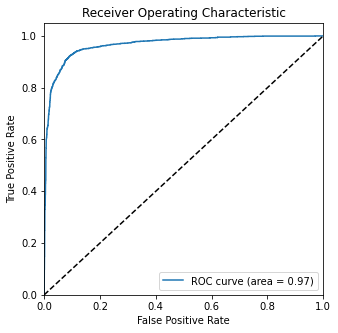

In [74]:
leadScore_draw_roc( y_leadScore_train_pred_final.Convert, y_leadScore_train_pred_final.Convert_Prob)

# optimal value of the cutoff

In [75]:
#Using different probability cutoffs, we can vary the threshold for predicting the convert status, enabling us to explore multiple classification outcomes and their corresponding predictions. This flexibility allows us to assess the impact of different cutoff values on the final results.

for i in [float(x)/10 for x in range(10)]:
    y_leadScore_train_pred_final[i]= y_leadScore_train_pred_final.Convert_Prob.map(lambda x: 1 if x > i else 0)
y_leadScore_train_pred_final.head()

,Convert,Convert_Prob,Pros_ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.998158,2746,1,1,1,1,1,1,1,1,1,1,1
1,0,0.002923,6543,0,1,0,0,0,0,0,0,0,0,0
2,1,0.910774,7458,1,1,1,1,1,1,1,1,1,1,1
3,1,0.988297,7448,1,1,1,1,1,1,1,1,1,1,1
4,1,0.950594,6134,1,1,1,1,1,1,1,1,1,1,1


In [76]:
data_frame = pnd.DataFrame(columns = ['probability_score','accuracy_score','sensitivity_score','specificity_score','precision_score'])

for i in [float(x)/10 for x in range(10)]:
    (accuracy_score,sensitivity_score,specificity_score,precision_sc) = leadScore_evaluate_model(y_leadScore_train_pred_final.Convert, y_leadScore_train_pred_final[i])
    data_frame.loc[i] =[i,accuracy_score,sensitivity_score,specificity_score,precision_sc]

data_frame

,probability_score,accuracy_score,sensitivity_score,specificity_score,precision_score
0.0,0.0,0.363196,1.000000,0.000000,0.363196
0.1,0.1,0.792791,0.973883,0.689507,0.641437
0.2,0.2,0.893971,0.947766,0.863290,0.798143
0.3,0.3,0.910835,0.928613,0.900695,0.842105
0.4,0.4,0.917369,0.905398,0.924197,0.871996
0.5,0.5,0.915051,0.866512,0.942734,0.896158
0.6,0.6,0.913364,0.825885,0.963257,0.927640
0.7,0.7,0.907673,0.788741,0.975505,0.948360
0.8,0.8,0.888069,0.726640,0.980139,0.954268
0.9,0.9,0.852867,0.610563,0.991063,0.974977


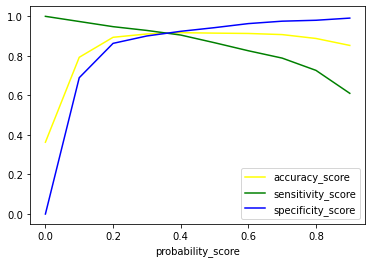

In [77]:
data_frame.plot.line(x='probability_score', y=['accuracy_score','sensitivity_score','specificity_score'],color=['yellow', 'green', 'blue'])
ply.show()

## Precision Recall Tradeoff

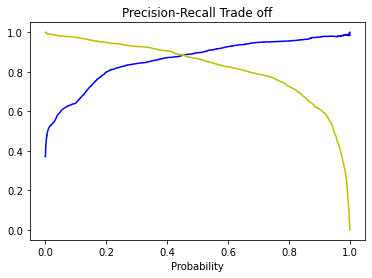

In [78]:
precision, recall, leadScore_thresholds = precision_recall_curve(y_leadScore_train_pred_final.Convert, y_leadScore_train_pred_final.Convert_Prob)

ply.plot(leadScore_thresholds, precision[:-1], "b-")
ply.plot(leadScore_thresholds, recall[:-1], "y-")
ply.xlabel("Probability")
ply.title("Precision-Recall Trade off")
ply.show()

Based on the Sensitivity-Specificity-Accuracy plot, a probability of 0.27 appears to be the optimal cutoff point. Similarly, in the Precision-Recall Curve, a probability of 0.3 seems to be the optimal threshold. Consequently, we have chosen 0.27 as the cutoff probability in the training data and are assigning the Lead Score based on this selection.

In [79]:
y_leadScore_train_pred_final = y_leadScore_train_pred_final.iloc[:, :3]
y_leadScore_train_pred_final['Convert_predicted'] = y_leadScore_train_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.27 else 0)

y_leadScore_train_pred_final['Lead_Score'] = y_leadScore_train_pred_final.Convert_Prob.map(lambda x: round(x*100))
y_leadScore_train_pred_final.head()

,Convert,Convert_Prob,Pros_ID,Convert_predicted,Lead_Score
0,1,0.998158,2746,1,100
1,0,0.002923,6543,0,0
2,1,0.910774,7458,1,91
3,1,0.988297,7448,1,99
4,1,0.950594,6134,1,95


In [93]:
leadScore_evaluate_model(y_leadScore_train_pred_final.Convert, y_leadScore_train_pred_final.Convert_predicted, print_score=True)

lead Score Confusion Matrix :
 [[2702  319]
 [ 116 1607]]
lead score Accuracy : 0.9083052276559865
lead Score Sensitivity : 0.9326755658734764
lead score Specificity : 0.8944058258854684
lead score Precision : 0.8343717549325026


(0.9083052276559865,
 0.9326755658734764,
 0.8944058258854684,
 0.8343717549325026)

In [81]:
leadScore_test_sm = statm.add_constant(X_leadScore_test[leadScore_column])
y_leadScore_test_pred = result_leadScore.predict(leadScore_test_sm)

y_leadScore_test_df = pnd.DataFrame(y_leadScore_test)
y_leadScore_test_pred_df = pnd.DataFrame(y_leadScore_test_pred, columns=["Converting_Probability"])
y_leadScore_test_df['Prospect ID'] = y_leadScore_test_df.index

y_leadScore_predicted_final = pnd.concat([y_leadScore_test_df.reset_index(drop=True), y_leadScore_test_pred_df.reset_index(drop=True)],axis=1)
y_leadScore_predicted_final['final_predicted'] = y_leadScore_predicted_final.Converting_Probability.map(lambda x: 1 if x > 0.27 else 0)
y_leadScore_predicted_final['Lead_Score'] = y_leadScore_predicted_final.Converting_Probability.map(lambda x: round(x*100))

y_leadScore_predicted_final.head()

,Converted,Prospect ID,Converting_Probability,final_predicted,Lead_Score
0,0,141,1.0,1,100
1,0,7418,1.0,1,100
2,1,6408,1.0,1,100
3,0,3128,1.0,1,100
4,1,1490,1.0,1,100


In [92]:
leadScore_evaluate_model(y_leadScore_predicted_final.Converted, y_leadScore_predicted_final.final_predicted, print_score=True)

lead Score Confusion Matrix :
 [[   9 1264]
 [   0  761]]
lead score Accuracy : 0.3785644051130777
lead Score Sensitivity : 1.0
lead score Specificity : 0.007069913589945012
lead score Precision : 0.37580246913580245


(0.3785644051130777, 1.0, 0.007069913589945012, 0.37580246913580245)

# Final model

In [89]:
def leadScore_build_model_cutoff(X_train, y_train, X_test, y_test, cutoff=0.5):
    
    # Train model
    X_train_statm = statm.add_constant(X_train)
    logm = statm.GLM(y_train,X_train_statm, family = statm.families.Binomial())
    res = logm.fit()

    y_train_pred = res.predict(X_train_statm).values.reshape(-1)
    
    y_train_pred_final = pnd.DataFrame({'Prospect ID':y_train.index, 'Converted':y_train.values, 'Convert_Probability':y_train_pred})
    y_train_pred_final['Convert_predicted'] = y_train_pred_final.Convert_Probability.map(lambda x: 1 if x > cutoff else 0)
    y_train_pred_final['Lead_Score'] = y_train_pred_final.Convert_Probability.map(lambda x: round(x*100))
    print("------------------Result of training data-------------------")
    print(y_train_pred_final.head())
    
    # Predicting Lead Score on Test data
    X_test_statm = statm.add_constant(X_test)
    y_test_pred = res.predict(X_test_statm)

    y_test_pred_final = pnd.DataFrame({'Prospect ID':y_test.index, 'Converted':y_test.values, 'Convert_Probability':y_test_pred})
    y_test_pred_final['Convert_predicted'] = y_test_pred_final.Convert_Probability.map(lambda x: 1 if x > cutoff else 0)
    y_test_pred_final['Lead_Score'] = y_test_pred_final.Convert_Probability.map(lambda x: round(x*100))
    y_test_pred_final.reset_index(inplace=True, drop=True)
    print("------------------Result of test data-------------------")
    print(y_test_pred_final.head())
    
    print("------------------Model Evaluation Metrics-------------------")
    leadScore_evaluate_model(y_test_pred_final.Converted, y_test_pred_final.Convert_predicted, print_score=True)
    
    return y_test_pred_final

In [90]:
leadScore_build_model_cutoff(X_leadScore_train[leadScore_column], y_leadScore_train, X_leadScore_test[leadScore_column], y_leadScore_test, cutoff=0.27)

------------------Result of training data-------------------
   Prospect ID  Converted  Convert_Probability  Convert_predicted  Lead_Score
0         2746          1             0.998158                  1         100
1         6543          0             0.002923                  0           0
2         7458          1             0.910774                  1          91
3         7448          1             0.988297                  1          99
4         6134          1             0.950594                  1          95
------------------Result of test data-------------------
   Prospect ID  Converted  Convert_Probability  Convert_predicted  Lead_Score
0          141          0                  1.0                  1         100
1         7418          0                  1.0                  1         100
2         6408          1                  1.0                  1         100
3         3128          0                  1.0                  1         100
4         1490          

,Prospect ID,Converted,Convert_Probability,Convert_predicted,Lead_Score
0,141,0,1.0,1,100
1,7418,0,1.0,1,100
2,6408,1,1.0,1,100
3,3128,0,1.0,1,100
4,1490,1,1.0,1,100
...,...,...,...,...,...
2029,6261,0,1.0,1,100
2030,5868,1,1.0,1,100
2031,1180,1,1.0,1,100
2032,5656,1,1.0,1,100


In [91]:
print("Features used in Final Model :", col)

print("-----------------------Feature Importance--------------------")
print(result_leadScore.params)

Features used in Final Model : Last Notable Activity
-----------------------Feature Importance--------------------
const                                      -1.366904
Do Not Email                               -1.374797
Total Time Spent on Website                 1.083616
Last Activity_SMS Sent                      1.485138
Tags_Busy                                   3.899089
Tags_Closed by Horizzon                     8.753978
Tags_Lost to EINS                           8.745353
Tags_Ringing                               -1.276227
Tags_Will revert after reading the email    3.717455
Tags_switched off                          -2.665014
Lead Quality_Not Sure                      -3.273366
Lead Quality_Worst                         -3.539447
Last Notable Activity_Modified             -1.294615
dtype: float64


# conclusion:

The logistic regression model is employed to estimate the likelihood of a specific value for the target variable, rather than directly predicting the value itself. To determine the predicted value of the target variable, a threshold probability is used as a cutoff point.

In this case, a logistic regression model is utilized to forecast the probability of a customer converting. An optimal cutoff of 0.27 is selected, meaning that any lead with a probability higher than 0.27 is classified as a "Hot Lead" (indicating the customer is likely to convert), while leads with a probability of 0.27 or lower are classified as "Cold Leads" (indicating the customer is unlikely to convert).



The final model includes a set of distinct features, such as 'Do Not Email', 'Total Time Spent on Website', 'Last Activity_SMS Sent', 'Tags_Busy', 'Tags_Closed, by Horizzon', 'Tags_Ringing', 'Tags_Will revert after reading the email', 'Tags_switched off', 'Lead Quality_Not Sure', 'Lead Quality_Worst', and 'Last Notable Activity_Modified'.


# Subjective Question



answer to first 
-------------------------------------------
The coefficients of these influential variables are as follows:

1. 'Tags_Lost to EINS' (Coefficient factor = 8.745353)
2. 'Tags_Closed by Horizzon' (Coefficient factor = 8.753978)
3. 'Lead Quality_Worst' (Coefficient factor = -3.539447)


answer to second
------------------------------------------
In the ultimate model, the three most influential categorical/dummy variables are 'Tags_Lost to EINS', 'Tags_Closed by Horizzon', and 'Lead Quality_Worst,' as determined by the absolute values of their coefficient factors.
----------------------------------------
'Tags_Lost to EINS' and 'Tags_Closed by Horizzon' were derived from the original categorical variable 'Tags' through encoding, while 'Lead Quality_Worst' resulted from encoding the categorical variable 'Lead Quality.'

# Subjective Question

3. X Education has a period of 2 months every year during which they hire some interns. The sales team, in particular, has around 10 interns allotted to them. So during this phase, they wish to make the lead conversion more aggressive. So they want almost all of the potential leads (i.e. the customers who have been predicted as 1 by the model) to be converted and hence, want to make phone calls to as much of such people as possible. Suggest a good strategy they should employ at this stage.

In [86]:
leadScore_build_model_cutoff(X_leadScore_train[leadScore_column],  y_leadScore_train, X_leadScore_test[leadScore_column], y_leadScore_test, cutoff=0.1)

------------------Result of training data-------------------
   Prospect ID  Converted  Convert_Probability  Convert_predicted  Lead_Score
0         2746          1             0.998158                  1         100
1         6543          0             0.002923                  0           0
2         7458          1             0.910774                  1          91
3         7448          1             0.988297                  1          99
4         6134          1             0.950594                  1          95
------------------Result of test data-------------------
   Prospect ID  Converted  Convert_Probability  Convert_predicted  Lead_Score
0          141          0                  1.0                  1         100
1         7418          0                  1.0                  1         100
2         6408          1                  1.0                  1         100
3         3128          0                  1.0                  1         100
4         1490          

,Prospect ID,Converted,Convert_Probability,Convert_predicted,Lead_Score
0,141,0,1.0,1,100
1,7418,0,1.0,1,100
2,6408,1,1.0,1,100
3,3128,0,1.0,1,100
4,1490,1,1.0,1,100
...,...,...,...,...,...
2029,6261,0,1.0,1,100
2030,5868,1,1.0,1,100
2031,1180,1,1.0,1,100
2032,5656,1,1.0,1,100


4. Similarly, at times, the company reaches its target for a quarter before the deadline. During this time, the company wants the sales team to focus on some new work as well. So during this time, the company’s aim is to not make phone calls unless it’s extremely necessary, i.e. they want to minimize the rate of useless phone calls. Suggest a strategy they should employ at this stage.

In [87]:
leadScore_build_model_cutoff(X_leadScore_train[leadScore_column],  y_leadScore_train, X_leadScore_test[leadScore_column], y_leadScore_test, cutoff=0.9)

------------------Result of training data-------------------
   Prospect ID  Converted  Convert_Probability  Convert_predicted  Lead_Score
0         2746          1             0.998158                  1         100
1         6543          0             0.002923                  0           0
2         7458          1             0.910774                  1          91
3         7448          1             0.988297                  1          99
4         6134          1             0.950594                  1          95
------------------Result of test data-------------------
   Prospect ID  Converted  Convert_Probability  Convert_predicted  Lead_Score
0          141          0                  1.0                  1         100
1         7418          0                  1.0                  1         100
2         6408          1                  1.0                  1         100
3         3128          0                  1.0                  1         100
4         1490          

,Prospect ID,Converted,Convert_Probability,Convert_predicted,Lead_Score
0,141,0,1.0,1,100
1,7418,0,1.0,1,100
2,6408,1,1.0,1,100
3,3128,0,1.0,1,100
4,1490,1,1.0,1,100
...,...,...,...,...,...
2029,6261,0,1.0,1,100
2030,5868,1,1.0,1,100
2031,1180,1,1.0,1,100
2032,5656,1,1.0,1,100
